<a href="https://colab.research.google.com/github/rhinroy2001/Deep-Learning-Project/blob/main/DeepLearningProjectThumbnail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NOTE: Some of the required files I am using to run this program need to be uploaded to colab's local files.**

Downloading dataset from Kaggle:

In [ ]:
!kaggle datasets download -d wchaktse/data-of-5132-youtube-videos
!unzip data-of-5132-youtube-videos.zip 

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open data-of-5132-youtube-videos.zip, data-of-5132-youtube-videos.zip.zip or data-of-5132-youtube-videos.zip.ZIP.


Req. imports:

In [ ]:
import io
import os
import requests
import shutil
import random
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
from google.colab import drive
import tensorflow as tf
import numpy as np
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from keras.preprocessing import image
!pip install numpy opencv-python pillow tensorflow keras imutils scikit-learn matplotlib
from tensorflow.keras.layers import BatchNormalization
from keras import regularizers
drive.mount("/content/drive")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Alternate Classifying Method (Dont run this section)

(optional)Adding view_score as alternate classification value to csv

---



In [ ]:
data_new = pd.read_csv('data_20210109_213012.csv')

totalViews = 0
viewScore = 0

viewList = data_new['view'].tolist()
viewScoreList = []
x=0
y=0


while x < len(data_new['view']):
    channelID = data_new['channel_sub'][x]
    IDCheck = channelID
    
    totalViews = 0
    y=0
    while (channelID == IDCheck) & (x+y < len(data_new['view'])):
        totalViews = totalViews + data_new['view'][x+y]
        y += 1   
        if(x+y < len(data_new['view'])):
            IDCheck = data_new['channel_sub'][x+y]
        else:
            IDCheck = -1

    channelAvg = totalViews/y

    for z in range(y):
        viewScore = (data_new['view'][x+z])/channelAvg
        viewScoreList.append(viewScore)


    x += y

totalSuccessPre = 0
totalFailurePre = 0

totalSuccessPost = 0
totalFailurePost = 0

data_new['view_score'] = viewScoreList
for x in range(len(data_new['view'])):
    if(data_new['view'][x]>392000):
        totalSuccessPre += 1
    else:
        totalFailurePre +=1
    
    if(data_new['view_score'][x] > 1):
        totalSuccessPost +=1
    else:
        totalFailurePost +=1


data_new.to_csv('newData.csv')

(optional) Classifying images by new view_score value

In [ ]:
path = '/content/newData.csv'

df = pd.read_csv(path)

views_thumbs = {}

for viewCnt, img in zip(df['view_score'], df['thumbnail']):
    views_thumbs[viewCnt] = img


# separating images based on successful/not successful
success_folder = 'successful
if not os.path.exists(success_folder):
    os.makedirs(success_folder)

noSuccess_folder = 'unsuccessful'
if not os.path.exists(noSuccess_folder):
    os.makedirs(noSuccess_folder)

i = 0
j = 0
for view, imageLink in views_thumbs.items():

  response = requests.get(imageLink, stream=True)
  image = Image.open(response.raw)

  if view > 1:
    file_name = os.path.join(success_folder, f'image_{i}.jpg')
    i += 1
  else:
    file_name = os.path.join(noSuccess_folder, f'image_{j}.jpg')
    j += 1
  
  image.save(file_name)

Parsing the data:
NOTE: This took a very long time to run, and its main purpose was to parse the data to download and use so I reccomend not running it unless you want to I guess. 

# Original Classifying Method (Use This One)

In [ ]:
path = '/content/data_20210109_213012.csv'

df = pd.read_csv(path)

views_thumbs = {}

for viewCnt, img in zip(df['view'], df['thumbnail']):
  views_thumbs[viewCnt] = img


# separating images based on successful/not successful
success_folder = 'successful'
if not os.path.exists(success_folder):
    os.makedirs(success_folder)

noSuccess_folder = 'unsuccessful'
if not os.path.exists(noSuccess_folder):
    os.makedirs(noSuccess_folder)

i = 0
j = 0
for view, imageLink in views_thumbs.items():

  response = requests.get(imageLink, stream=True)
  image = Image.open(response.raw)

  if view > 392000:
    file_name = os.path.join(success_folder, f'image_{i}.jpg')
    i += 1
  else:
    file_name = os.path.join(noSuccess_folder, f'image_{j}.jpg')
    j += 1
  
  image.save(file_name)

Preparing the data into training and validation sets:


In [ ]:
!unzip /content/drive/MyDrive/data

Streaming output truncated to the last 5000 lines.
  inflating: unsuccessful/image_6198.jpg  
  inflating: unsuccessful/image_6190.jpg  
  inflating: unsuccessful/image_6195.jpg  
  inflating: unsuccessful/image_6217.jpg  
  inflating: unsuccessful/image_6193.jpg  
  inflating: unsuccessful/image_6197.jpg  
  inflating: unsuccessful/image_6208.jpg  
  inflating: unsuccessful/image_6202.jpg  
  inflating: unsuccessful/image_6184.jpg  
  inflating: unsuccessful/image_6185.jpg  
  inflating: unsuccessful/image_6177.jpg  
  inflating: unsuccessful/image_6194.jpg  
  inflating: unsuccessful/image_6188.jpg  
  inflating: unsuccessful/image_6175.jpg  
  inflating: unsuccessful/image_6183.jpg  
  inflating: unsuccessful/image_6192.jpg  
  inflating: unsuccessful/image_6181.jpg  
  inflating: unsuccessful/image_6176.jpg  
  inflating: unsuccessful/image_6182.jpg  
  inflating: unsuccessful/image_6191.jpg  
  inflating: unsuccessful/image_6179.jpg  
  inflating: unsuccessful/image_6174.jpg  
  i

# Data Preprocessing

In [ ]:
# unzipping the data folder I upload locally;
# this contains two subfolders 'successful' and 'unsuccessful'
# as parsed and created above

!pip install split-folders
import splitfolders

splitfolders.ratio("data", output="sets", seed=1337, ratio=(0.7, 0.2, 0.1)) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 22661 files [00:18, 1198.72 files/s]


Data Preprocessing:

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# rescaling images
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# creating batches of 120 for training images
train_generator = train_datagen.flow_from_directory(
        '/content/sets/train',  # source dir for training images
        classes = ['successful', 'unsuccessful'],
        target_size=(100, 100),  # resizing images to 100 x 100
        batch_size=120,
        class_mode='binary')

# creating batches of 19 for validation images
validation_generator = validation_datagen.flow_from_directory(
        '/content/sets/val',  
        classes = ['successful', 'unsuccessful'],
        target_size=(100, 100),
        batch_size=19,
        class_mode='binary',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
    directory=r"/content/sets/test",
    classes = ['successful', 'unsuccessful'],
    target_size=(100, 100),
    batch_size=19,
    class_mode='binary',
    shuffle=False,
    seed=42)

Found 15861 images belonging to 2 classes.
Found 4531 images belonging to 2 classes.
Found 2269 images belonging to 2 classes.


# The CNN Model

Building the model:

I'm creating 3 layers here-


1.   One that flattens the images
2.   A fully connected layer
3.   A sigmoid layer

In [ ]:
model = tf.keras.models.Sequential([BatchNormalization(),
                                    tf.keras.layers.Conv2D(100, (3, 3), activation='relu', input_shape=(100, 100, 3)),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    tf.keras.layers.Conv2D(200, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    tf.keras.layers.Conv2D(200, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(200, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])




Using Adam optimizer to aid in tuning learning rate:

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.0001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

Trying out an alternative optimizer SGD: **NVM DONT USE THIS ONE IT SUCKS

In [ ]:
from keras.optimizers import SGD
opt = SGD(learning_rate=0.0001, momentum=0.9)
model.compile(loss = "binary_crossentropy", optimizer = opt, metrics=['accuracy'])

Training the set!! I'm gonna do 15 epochs:

In [ ]:
history = model.fit(train_generator,
      steps_per_epoch=100, # 108? 
      epochs=12,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=100) # 108?

Epoch 1/12
100/100 [==============================] - 1683s 17s/step - loss: 0.6622 - accuracy: 0.6348 - val_loss: 0.8670 - val_accuracy: 0.1226
Epoch 2/12
100/100 [==============================] - 1658s 17s/step - loss: 0.6590 - accuracy: 0.6290 - val_loss: 0.8467 - val_accuracy: 0.1226
Epoch 3/12
100/100 [==============================] - 1612s 16s/step - loss: 0.6500 - accuracy: 0.6330 - val_loss: 0.9087 - val_accuracy: 0.1247
Epoch 4/12
100/100 [==============================] - 1613s 16s/step - loss: 0.6452 - accuracy: 0.6372 - val_loss: 1.0366 - val_accuracy: 0.1237
Epoch 5/12
100/100 [==============================] - 1600s 16s/step - loss: 0.6339 - accuracy: 0.6452 - val_loss: 0.8497 - val_accuracy: 0.2205
Epoch 6/12
100/100 [==============================] - 1556s 16s/step - loss: 0.6123 - accuracy: 0.6704 - val_loss: 0.8217 - val_accuracy: 0.3116
Epoch 7/12
100/100 [==============================] - 1654s 17s/step - loss: 0.5862 - accuracy: 0.6985 - val_loss: 1.1481 - val_ac

Evaluating the accuracy using the validation set:

239/239 [==============================] - 202s 843ms/step


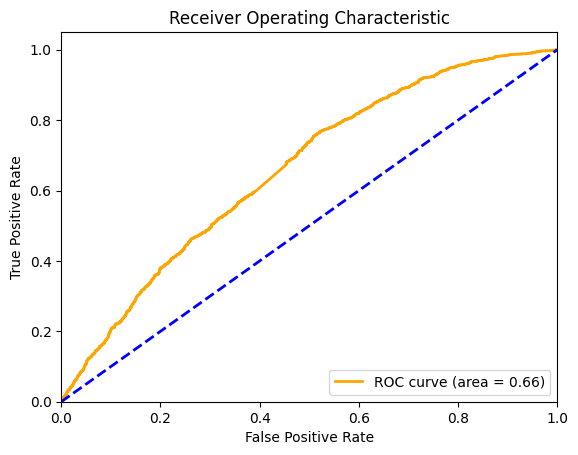

In [ ]:
model.evaluate(validation_generator)

# make predictions on validation set
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

# computing false positive and true positive rate
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)

# plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='orange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Evaluating accuracy of test set:

120/120 [==============================] - 99s 827ms/step


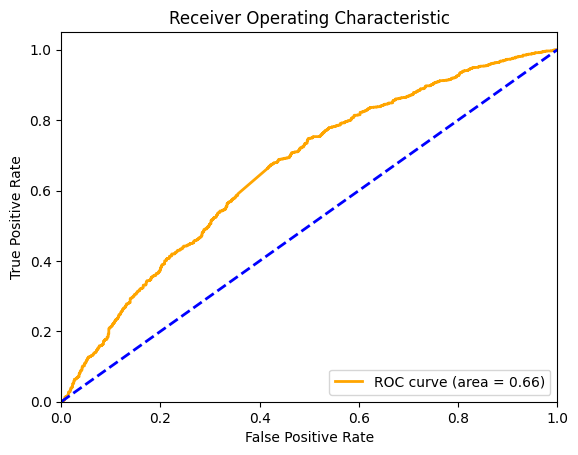

In [ ]:
model.evaluate(test_generator)

# make predictions on validation set
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
preds = model.predict(test_generator,
                      verbose=1)

# computing false positive and true positive rate
fpr, tpr, _ = roc_curve(test_generator.classes, preds)
roc_auc = auc(fpr, tpr)

# plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='orange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Making Predictions:

Uploading images for the algorithm to predict whether or not a video will

be successful based off of the uploaded thumbnail.

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/test/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " will be successful")
  else:
    print(fn + " will be unsuccessful")